<a href="https://colab.research.google.com/github/narrasriram/EMOTION-RECOGNITION-USING-FINE-TUNED-MODELS-ERFM-/blob/main/Colab%20Model%20building%20Files/Regression/Models%20on%20Emotion%20Stimulus%20Dataset/Random%20Forest%20Regression/Emotion_Stimulus_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
# -*- coding: utf-8 -*-

# Author: Sriram Narra
# Course: CS 842
# Date: Apr 15, 2021
# Project Name: Emotion Recognition using Fine-tuned Models(ERFM)
# Description: This notebook builds a Random Forest Regression Model on Emotion 
#              Stimulus Dataset and checks the performance of the 
#              model with various model evaluation metrics
# --------------------------------------------------------------------------------

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from pandas import DataFrame
import textblob
from textblob import TextBlob
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Read the Dataset into a List

In [ ]:
with open('/content/drive/MyDrive/Data Science Project/Datasets/Emotion_Stimulus/No_Cause.txt') as f:
    conversations = f.readlines()

In [ ]:
conversations[-1]

'<shame>GRAHAM TAYLOR will defy the fury of a humiliated nation and risk his entire reputation on an England miracle in the next five months . <\\shame>\n'

Data Transformation into Dictionary with Sentences as Key and Values as Emotions

In [ ]:
import re
from bs4 import BeautifulSoup

data = {}

for line in conversations:
    result = re.search(r"<[a-zA-z]+>", line)
    emotion = result.group(0)
    emotion  = emotion[1:(len(emotion)-1)]
    #print(emotion)

    soup = BeautifulSoup(line)
    x = soup.findAll(emotion)
    #print(x)

    txt = ''.join(x[0].findAll(text=True)).strip()

    data[txt] = emotion
print(data)




{'This did the trick : the boys now have a more distant friendship and David is much happier .': 'happy', 'When Anna left Inspector Aziz , she was much happier .': 'happy', "And though , as Lachlan had planned , they had expected the attack in the morning , they were quite happy when their lookouts reported the Macleans ' approach in the early evening .": 'happy', "Honestly , I 'm really happy for you !": 'happy', 'Lesley was totally happy about it .': 'happy', 'For once in his life , Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition .': 'happy', 'She became happier , more settled .': 'happy', 'During the day her mother seemed happy at times , baking , trying out fresh recipes , or changing yet again the curtains , or crocheting new chair-backs .': 'happy', 'They seemed happy about my victory in Germany and most of them expected me to win more races last year . "': 'happy', 'Never before had Bodmin seen so many faces 

Data Transformation into Dataframe

In [ ]:
data_frame = DataFrame(data.items(), columns=['Sentence', 'Emotion'])

In [ ]:
data_frame.head()

,Sentence,Emotion
0,This did the trick : the boys now have a more ...,happy
1,"When Anna left Inspector Aziz , she was much h...",happy
2,"And though , as Lachlan had planned , they had...",happy
3,"Honestly , I 'm really happy for you !",happy
4,Lesley was totally happy about it .,happy


Subjectivity Score Retrieval Function Declaration

In [ ]:
def getScore(data):
  return TextBlob(data).sentiment.subjectivity

In [ ]:
data_frame["Subj_Score"] = data_frame["Sentence"].apply(getScore)

In [ ]:
data_frame.tail()

,Sentence,Emotion,Subj_Score
1584,He gets real humiliated and has to leave .,shame,0.3000
1585,They aimed for higher status jobs and felt hum...,shame,0.5000
1586,He cursed his lack of self-control ; he knew t...,shame,0.2000
1587,Sometimes I've thought I 'll never forget what...,shame,0.5750
1588,GRAHAM TAYLOR will defy the fury of a humiliat...,shame,0.3125


In [ ]:
print(data_frame["Emotion"].value_counts())

sad         467
anger       283
fear        278
happy       268
surprise    160
shame        76
disgust      57
Name: Emotion, dtype: int64


Outlier Analysis

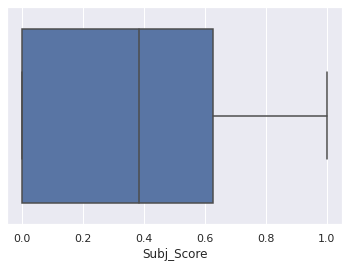

In [ ]:
import seaborn as sns
sns.boxplot(x=data_frame['Subj_Score'])

Balanced/Imbalanced Data check on Subjectivity Score Bins

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f157ec95c50>]],
      dtype=object)

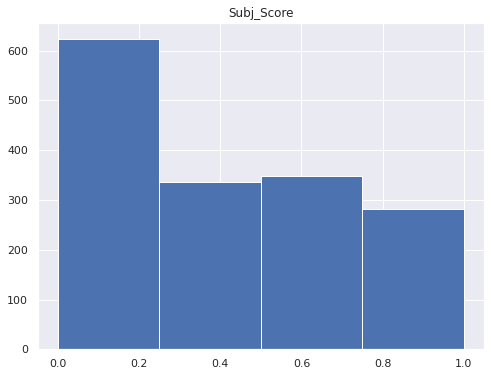

In [ ]:
data_frame.hist(column=['Subj_Score'],bins=4, figsize=(8,6))

Balancing the Imbalanced Data of Subjectivity Score Bins

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f157ecd5a50>]],
      dtype=object)

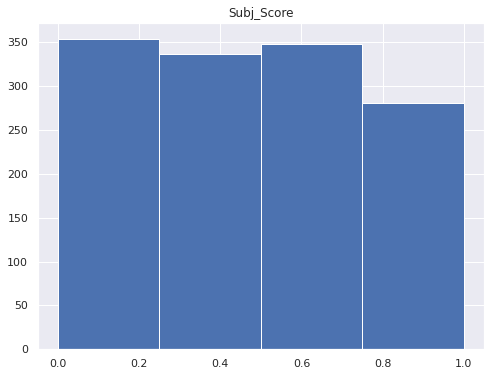

In [ ]:
count = 1
columns = ['Sentence','Emotion', 'Subj_Score']
zero_df = None
zero_df = pd.DataFrame(columns=columns)

for index, row in data_frame.iterrows():
  if(row['Subj_Score']==0.0 and count<=270):
    #print("entered")
    zero_df.loc[data_frame.index[index]] = data_frame.iloc[index]
    count+=1

cond = data_frame['Sentence'].isin(zero_df['Sentence'])
data_frame.drop(data_frame[cond].index, inplace = True)
data_frame.hist(column=['Subj_Score'],bins=4, figsize=(8,6))

In [ ]:
data_frame = data_frame.sample(frac=1).reset_index(drop=True)
data_frame.head()

,Sentence,Emotion,Subj_Score
0,The passengers looked horrified .,fear,0.000000
1,I became concerned when I saw my husband becom...,fear,0.725000
2,I felt that she was quite distressed by the bi...,sad,0.100000
3,"He did n't seem offended , he did n't exactly ...",anger,0.250000
4,Now her vivid imagination had no difficulty in...,sad,0.605556


In [ ]:
data_frame = data_frame.reset_index(drop=True)
zero_df = zero_df.reset_index(drop=True)


Balacnced/Imbalanced Data Analysis

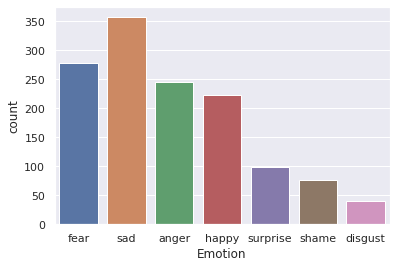

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Emotion", data=data_frame)

Missing Values Analysis

In [ ]:
data_frame.isnull().values.any()

False

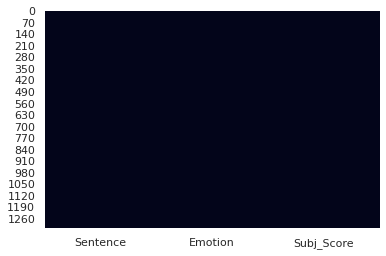

In [ ]:
sns.heatmap(data_frame.isnull(), cbar=False)

In [ ]:
len(data_frame)

1319

Data Cleaning

In [ ]:
req_sentences_list = []
for i in range(0, len(data_frame)):
    substituted_sentence = re.sub('[^a-zA-Z]', ' ', data_frame['Sentence'][i])
    # Take the lower case alphabets of every sentence
    lower_cased_sentence = substituted_sentence.lower()

    # Split every word in the sentence
    splitted_sentence = lower_cased_sentence.split()

    # Stem every word to its root word
    ps = PorterStemmer()
    stemmed_sentence = [ps.stem(each_word) for each_word in splitted_sentence if not each_word in set(stopwords.words('english'))]

    # Join the divided words
    cleaned_sentence = ' '.join(stemmed_sentence)

    # Append the cleaned sentence to the list
    req_sentences_list.append(cleaned_sentence)

Label Encoding the Emotion Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['Emotion'] = le.fit_transform(data_frame['Emotion'])

Transforming the Sentences into Features(By taking the 1589 words)

In [ ]:
feature_count_calc = CountVectorizer(max_features = 1589)
feature_count_calc.fit(req_sentences_list)
X = feature_count_calc.transform(req_sentences_list).toarray()
y = data_frame.iloc[:, 2].values

Scaling all the features into single scale

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

Split the dataset into Training and Testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

Fitting Ranfom Forest Regressor to the Training set

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Appending the additional removed records from the initial dataset in the test set

In [ ]:
req_sentences_list = []
for i in range(0, len(zero_df)):
    substituted_sentence_2 = re.sub('[^a-zA-Z]', ' ', zero_df['Sentence'][i])
    # Take the lower case alphabets of every sentence
    lower_cased_sentence_2 = substituted_sentence_2.lower()

    # Split every word in the sentence
    splitted_sentence_2 = lower_cased_sentence_2.split()

    # Stem every word to its root word
    ps = PorterStemmer()
    stemmed_sentence_2 = [ps.stem(each_word) for each_word in splitted_sentence_2 if not each_word in set(stopwords.words('english'))]

    # Join the divided words
    cleaned_sentence_2 = ' '.join(stemmed_sentence_2)

    # Append the cleaned sentence to the list
    req_sentences_list.append(cleaned_sentence_2)

additional_x_test = feature_count_calc.transform(req_sentences_list).toarray()
additional_y_test = zero_df.iloc[:, 2].values

scaled_additional_x_test = sc_X.transform(additional_x_test)

In [ ]:
X_test = np.concatenate((X_test, additional_x_test))
y_test = np.concatenate((y_test, additional_y_test))

Prediction of Testset Results

In [ ]:
y_pred = regressor.predict(X_test)

Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(mse)

0.12831414345794503


Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.3256285770027184

RMSE

In [ ]:
import math

root_mean_squared_error = math.sqrt(mse)
print(root_mean_squared_error)

0.358209636188008


References:

1.  Edward Loper and Steven Bird. “NLTK: The Natural Language Toolkit”. In:CoRRcs.CL/0205028(2002).url:http://dblp.uni- trier.de/db/journals/corr/corr0205.html#cs- CL-0205028

2. Guido Van Rossum and Fred L. Drake.Python 3 Reference Manual. Scotts Valley, CA: CreateS-pace, 2009.isbn: 1441412697.

3.  F. Pedregosa et al. “Scikit-learn: Machine Learning in Python”. In:Journal of Machine LearningResearch12 (2011), pp. 2825–2830.

4. Conversion of Input into Word Features - https://github.com/narrasriram/data_science/blob/master/machine_learning/natural%20language%20processing/sentiment%20classification/natural_language_processing.py